<!--NOTEBOOK_HEADER-->
*This notebook contains material from [PyRosetta](https://RosettaCommons.github.io/PyRosetta.notebooks);
content is available [on Github](https://github.com/RosettaCommons/PyRosetta.notebooks.git).*

<!--NAVIGATION-->
< [RosettaCarbohydrates](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.00-RosettaCarbohydrates-Working-with-Glycans.ipynb) | [Contents](toc.ipynb) | [Index](index.ipynb) | [RosettaCarbohydrates: Modeling and Design](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.02-Glycan-Modeling-and-Design.ipynb) ><p><a href="https://colab.research.google.com/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.01-Glycan-Trees-Selectors-and-Movers.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# RosettaCarbohydrates: Trees, Selectors and Movers
Keywords: carbohydrate, glycan, glucose, mannose, sugar, ResidueSelector, Mover

## Overview
Here, we will cover useful `ResidueSelectors` and `Movers` available in the RosettaCarbohdyrate framework.  All of these framework components form the basis for the tools you will use in the next tutorial, Glycan Modeling and Design.

**Make sure you are in the directory with the pdb files:**

`cd google_drive/My\ Drive/student-notebooks/`

## Imports

Before we begin, we must import some specific machinery from Rosetta.  Much of these tools are automatically imported when we do `from pyrosetta import *`, however, some are not. You should get into the habit of importing everything you need.  This will get you comfortable with the organization of Rosetta and make it easier to find tools that are beyond the scope of these workshops.

In [ ]:
# Notebook setup
import sys
if 'google.colab' in sys.modules:
    !pip install pyrosettacolabsetup
    import pyrosettacolabsetup
    pyrosettacolabsetup.setup()
    print ("Notebook is set for PyRosetta use in Colab.  Have fun!")

In [1]:
#Python
from pyrosetta import *
from pyrosetta.rosetta import *
from pyrosetta.teaching import *


## Intitlialization 

Here, we will be opening a PDB file with glycans, so we will use `-include_sugars` and a few other options that allow us to read (most) PDB files without issue. It is always a good idea to use the `GlycanInfoMover` to double check that the glycans you are interested in are properly represented by Rosetta.  If they are not, post the issue in the Rosetta forums.

Once again, more information on working with glycans can be found at this page: [Working With Glycans](https://www.rosettacommons.org/docs/latest/application_documentation/carbohydrates/WorkingWithGlycans)

### PDB vs Rosetta sugar format

Unfortunately, there are few standards in the PDB for how saccharide residues in `.pdb` files should be numbered and named. The Rosetta code — with the appropriate flags initialization flags, such as `-alternate_3_letter_codes pdb_sugar` tries its best to interpret `.pdb` files with sugars, but because of ambiguity and inconsistency, success is in no way ensured.  See http://www.rosettacommons.org/docs/latest/rosetta_basics/preparation/Preparing-PDB-files-for-non-peptide-polymers for more info


To guarantee that one can model the specific saccharide system desired unabiguously, Rosetta uses a slightly modified `.pdb` format for importing carbohydrate residues. The key difference in formats involves the `HETNAM` record of the PDB format. The standard PDB `HETNAM` record line:</p>

```HETNAM     GLC ALPHA-D-GLUCOSE```

...means that all `GLC` 3-letter codes in the <em>entire file</em> are α-<font style="font-variant: small-caps">d</font>-glucose, which is insufficient, as this 
could mean several different α-<font style="font-variant: small-caps">d</font>-glucoses, depending on the ring form and on the main-chain connectivity of the glycan — and 
many, many more if one includes modified sugars! The modified Rosetta-ready PDB `HETNAM` 
record line:</p>

```HETNAM     Glc A   1  ->4)-alpha-D-Glcp```

...means that the `GLC` residue <em>specifically at position A1</em> requires the `->4)-alpha-D-Glcp` `ResidueType` or any of its `VariantType`s. (Note also that Rosetta uses sentence case 3-letter-codes for sugars.)</p>

Rosetta will output and input with this default format. 
We use `-alternate_3_letter_codes pdb_sugar` to read in the PDB-format sugar and `-write_glycan_pdb_codes` to output the PDB format since we will be working with a structure directly from the PDB.





In [2]:
options = """
-ignore_unrecognized_res
-include_sugars
-auto_detect_glycan_connections
-maintain_links 
-alternate_3_letter_codes pdb_sugar
-write_glycan_pdb_codes
-ignore_zero_occupancy false 
-load_PDB_components false
-no_fconfig
"""

In [3]:
init(" ".join(options.split('\n')))

PyRosetta-4 2019 [Rosetta PyRosetta4.Release.python36.mac 2019.39+release.93456a567a8125cafdf7f8cb44400bc20b570d81 2019-09-26T14:24:44] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Rosetta version: PyRosetta4.Release.python36.mac r233 2019.39+release.93456a567a8 93456a567a8125cafdf7f8cb44400bc20b570d81 http://www.pyrosetta.org 2019-09-26T14:24:44
core.init: command: PyRosetta -ignore_unrecognized_res -include_sugars -auto_detect_glycan_connections -maintain_links -alternate_3_letter_codes pdb_sugar -write_glycan_pdb_codes -ignore_zero_occupancy false -load_PDB_components false -no_fconfig -database /Users/jadolfbr/Library/Python/3.6/lib/python/site-packages/pyrosetta-2019.39+release.93456a567a8-py3.6-macosx-10.6-intel.egg/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=329193242 seed_offset=0 real_seed=329193242
basic.ra

In [4]:
pose = pose_from_pdb("inputs/glycans/4do4_refined.pdb")
pose_original = pose.clone()

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 1251 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.24209 seconds.
core.import_pose.import_pose: File 'inputs/glycans/4do4_refined.pdb' automatically determined to be of type PDB
core.io.util: Automatic glycan connection is activated.
core.io.util: Start reordering residues.
core.io.util: Corrected glycan residue order (internal numbering): [388, 389, 390, 391, 392, 393, 394, 395, 396, 797, 798, 799, 800, 801, 802, 803, 804, 805]
core.io.util: 
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 390
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 394
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 395
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 396
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 798
core.io.pose_from_sfr.PoseFromSFRBuilder: Se

core.conformation.Conformation: current variant for 110 CYD
core.conformation.Conformation: current variant for 141 CYD
core.conformation.Conformation: Found disulfide between residues 506 537
core.conformation.Conformation: current variant for 506 CYS
core.conformation.Conformation: current variant for 537 CYS
core.conformation.Conformation: current variant for 506 CYD
core.conformation.Conformation: current variant for 537 CYD
core.conformation.Conformation: Found disulfide between residues 170 192
core.conformation.Conformation: current variant for 170 CYS
core.conformation.Conformation: current variant for 192 CYS
core.conformation.Conformation: current variant for 170 CYD
core.conformation.Conformation: current variant for 192 CYD
core.conformation.Conformation: Found disulfide between residues 566 588
core.conformation.Conformation: current variant for 566 CYS
core.conformation.Conformation: current variant for 588 CYS
core.conformation.Conformation: current variant for 566 CYD
c

## Object Exploration: GlycanTreeSet, CarbohydrateInfo, and the GlycanInfoMover

Before we do anything else, lets get some information on the pose that we are working with.

### GlycanTreeSet

The `GlycanTreeSet` is created when glycans are added to a pose or a pose is created with glycans in it.  The `GlycanTreeSet` has information on each glycan tree and each residue's parent and child.  The tree set also has an observer attached to it, so it will auto-update itself when glycan residues are attached or removed from the pose.  The `GlycanTreeSet` is a part of the Pose's `Conformation` object.  First, lets expore this. 

Lets find out how many glycan trees are and their lengths. 

In [6]:
tree_set = pose.glycan_tree_set()

In [7]:
print(tree_set.n_trees())

6


Ok, so there are 6 glycan trees in our pose!  Cool.  Lets see what the largest one is:

In [9]:
print(tree_set.get_largest_glycan_tree_length())

5


#### GlycanTree and GlycanNode

The `GlycanTreeSet` is made up of `GlycanTree` objects.  Each of these is made up of `GlycanNodes` for each residue in a tree. Lets expore these.

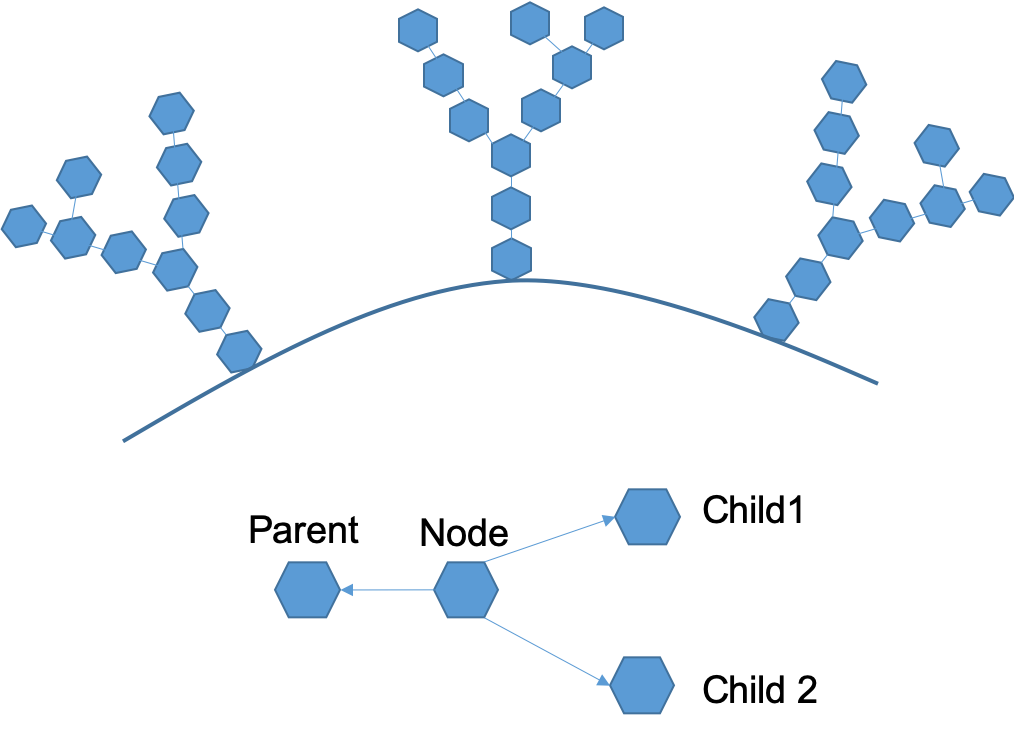

In [1]:
from IPython.display import Image
Image('./Media/tree_set.png',width='500')

In [11]:
for start in tree_set.get_start_points():
    print(start, pose.pdb_info().pose2pdb(start), pose.residue_type(start).name3(), pose.residue_type(start).name())

388 501 A  Glc ->4)-beta-D-Glcp:2-AcNH
391 504 A  Glc ->4)-beta-D-Glcp:2-AcNH
396 509 A  Glc ->3)-beta-D-Glcp:non-reducing_end:2-AcNH
797 501 B  Glc ->4)-beta-D-Glcp:->6)-branch:2-AcNH
800 504 B  Glc ->4)-beta-D-Glcp:2-AcNH
805 509 B  Glc ->3)-beta-D-Glcp:non-reducing_end:2-AcNH


Lets look at the parent of each of these glycan start points to see if they are connected to a protein, and if so, what residue they are attached to.

In [12]:
for start in tree_set.get_start_points():
    parent = tree_set.get_parent(start)
    parent_naem = "NONE"
    if parent != 0:
        parent_name = pose.residue_type(parent).name3()
    print(parent, pose.pdb_info().pose2pdb(parent), parent_name)

107 124 A  ASN
160 177 A  ASN
368 385 A  ASN
503 124 B  ASN
556 177 B  ASN
764 385 B  ASN


Cool.  So they are all connected to protein residues at an Asparigine.  Lets take a look at the first sugar. 

In [13]:
tree1 = tree_set.get_tree(388)

In [15]:
print("length", tree1.size())
print("root", tree1.get_root())

length 3
root 107


In [16]:
for res in tree1.get_residues():
    print(res, pose.residue_type(res).name3(), pose.residue_type(res).name())

388 Glc ->4)-beta-D-Glcp:2-AcNH
389 Glc ->4)-beta-D-Glcp:2-AcNH
390 Man ->3)-beta-D-Manp:non-reducing_end


Lets take a closer look at that Mannose, at the end of the tree.

In [19]:
node390 = tree1.get_node(390)

In [23]:
print("n_children", len(node390.get_children()))
print("parent", node390.get_parent())
print("distance", node390.get_distance_to_start())
print("exocylic_connection", node390.has_exocyclic_linkage())

n_children 0
parent 389
distance 2
exocylic_connection False


### CarbohydrateInfo

Lets get a bit more information on this particular glycan residue.

In [24]:
info390 = pose.residue_type(390).carbohydrate_info()

In [25]:
info390.anomeric_carbon()

1

In [38]:
info390.anomeric_carbon_name()

'C1'

In [28]:
info390.basic_name()

'mannose'

In [29]:
info390.cyclic_oxygen()

5

In [30]:
info390.cyclic_oxygen_name()

' O5 '

In [31]:
info390.full_name()

'beta-D-mannopyranosyl'

In [32]:
info390.has_exocyclic_linkage_to_child_mainchain()

False

In [33]:
info390.is_alpha_sugar()

False

In [34]:
info390.is_amino_sugar()

False

In [35]:
info390.is_beta_sugar()

True

In [36]:
info390.is_cyclic()

True

In [37]:
info390.is_acetylated()

False

As you can see, the `CarbohydrateInfo` object of `ResidueType` provides a great deal of information on this particular sugar.  By using the `GlycanTreeSet` and the `CarbohdrateInfo` objects, one can delineate nearly everything you wish to know about about a particular tree, glycan, and the connections of them in respect to each other and the whole pose. 

## GlycanInfoMover

This mover essentially prints much of the connectivity information of a particular pose.  It is useful as a first-pass to get general info and to make sure that Rosetta is loading your glycan properly.

Note: You will need to look at the terminal for output of this mover.

In [39]:
from rosetta.protocols.analysis import *

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  """Entry point for launching an IPython kernel.


In [40]:
glycan_info = GlycanInfoMover()
glycan_info.apply(pose)

(Output copied below)

```
branch Point: ASN 107 124 A 
Branch Point: ASN 160 177 A 
Branch Point: ASN 368 385 A 
Carbohydrate: 388 501 A  Parent: 107 BP: 0 501 A   CON: _->4       DIS: 0 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 389 502 A  Parent: 388 BP: 0 502 A   CON: _->4       DIS: 1 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 390 503 A  Parent: 389 BP: 0 503 A   CON:            DIS: 2 ShortName: beta-D-Manp-
Carbohydrate: 391 504 A  Parent: 160 BP: 0 504 A   CON: _->4       DIS: 0 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 392 505 A  Parent: 391 BP: 0 505 A   CON: _->4       DIS: 1 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 393 506 A  Parent: 392 BP: 1 506 A   CON: _->3,_->6  DIS: 2 ShortName: ->3)-beta-D-Manp-
Carbohydrate: 394 507 A  Parent: 393 BP: 0 507 A   CON:            DIS: 3 ShortName: alpha-D-Manp-
Carbohydrate: 395 508 A  Parent: 393 BP: 0 508 A   CON:            DIS: 3 ShortName: alpha-D-Manp-
Carbohydrate: 396 509 A  Parent: 368 BP: 0 509 A   CON:            DIS: 0 ShortName: beta-D-GlcpNAc-
Branch Point: ASN 503 124 B 
Branch Point: ASN 556 177 B 
Branch Point: ASN 764 385 B 
Carbohydrate: 797 501 B  Parent: 503 BP: 1 501 B   CON: _->4,_->6  DIS: 0 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 798 502 B  Parent: 797 BP: 0 502 B   CON:            DIS: 1 ShortName: beta-D-GlcpNAc-
Carbohydrate: 799 503 B  Parent: 797 BP: 0 503 B   CON:            DIS: 1 ShortName: alpha-L-Fucp-
Carbohydrate: 800 504 B  Parent: 556 BP: 0 504 B   CON: _->4       DIS: 0 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 801 505 B  Parent: 800 BP: 0 505 B   CON: _->4       DIS: 1 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 802 506 B  Parent: 801 BP: 1 506 B   CON: _->3,_->6  DIS: 2 ShortName: ->3)-beta-D-Manp-
Carbohydrate: 803 507 B  Parent: 802 BP: 0 507 B   CON:            DIS: 3 ShortName: alpha-D-Manp-
Carbohydrate: 804 508 B  Parent: 802 BP: 0 508 B   CON:            DIS: 3 ShortName: alpha-D-Manp-
Carbohydrate: 805 509 B  Parent: 764 BP: 0 509 B   CON:            DIS: 0 ShortName: beta-D-GlcpNAc-
Glycan Residues: 18
Protein BPs: 6
TREES
107 124 A  Length: 3
160 177 A  Length: 5
368 385 A  Length: 1
503 124 B  Length: 3
556 177 B  Length: 5
764 385 B  Length: 1
```

### Branched Connections

Now we can see all of our glycans in the pose, all of their parents, and how all of them are connected to one another. Note residue 803 - here we have two connections.  both at carbons 3 and 6.  This means we have a branched connection and that residue 802 has two children.  A branched connection is always at carbon 6, which is an exocyclic connection.  This point has 3 backbone dihedrals instead of our standard two.  Lets confirm all of that. 

In [50]:
#This is code used to get the branch points in CarbohydrateInfoMover, converted from C++:
def get_connections(localpose, resnum):
    info = localpose.residue(resnum).carbohydrate_info()
    outstring = ""
    attach = "_->"

    if info.mainchain_glycosidic_bond_acceptor():
        outstring = attach + str(info.mainchain_glycosidic_bond_acceptor())
    

    for i in range(1, info.n_branches()+1):
        outstring = outstring + "," +attach + str(info.branch_point( i ))
    
    return outstring;
                   
get_connections(pose, 802)

'_->3,_->6'

In [52]:
tree802 = tree_set.get_tree_containing_residue(802)
node802 = tree_set.get_node(802)

In [53]:
print("len", tree802.size())
print("children", node802.get_children())
print("exocyclic", node802.has_exocyclic_linkage())

len 5
children vector1_unsigned_long[803, 804]
exocyclic False


Note that 802 doesn't have an exocyclic back to it's parent - however, one of its children has the exocyclic connection back to it.  Lets find out which one.

In [54]:
print("exo_803", tree802.get_node(803).has_exocyclic_linkage())
print("exo_804", tree802.get_node(804).has_exocyclic_linkage())

exo_803 False
exo_804 True


Cool.  So residue 804 is branched connection. Lets take a closer look.

In [56]:
node804 = tree802.get_node(804)
node803 = tree802.get_node(803)

In [58]:
node802.get_mainchain_child()

803

### MoveMapFactory vs MoveMap creation

Here is something important to note.  Rosetta has a concept of the 'mainchain' as it was primarily written for proteins - that are linear in nature.  At the deep part of Rosetta, even sugars are denoted as having a 'mainchain'.  This mainchain is the 'non-branched' connections.  In this case, the mainchain continues onto residue 803, while the 'branch' goes off to residue 804.  This is __EXTREMELY__ important to be aware of as MoveMaps have seperate switches for 'branched' torsions.  In this way, you should always use the `MoveMapFactory` which does all this automatically for creating glycan Movemaps or torsions that are branched will not be turned on!!! 

After that side-note, lets confirm that there are indeed 3 torsions for the branched connection of residue 802 and 804. Remember that torsions are defined from child TO parent!

In [61]:
from rosetta.core.pose.carbohydrates import *
from rosetta.core.conformation.carbohydrates import *

In [63]:
get_n_glycosidic_torsions_in_res(pose.conformation(), 804)

3

Great.  We have 3. Lets make sure our mainchild child has two.

In [64]:
get_n_glycosidic_torsions_in_res(pose.conformation(), 803)

2

Awesome.  Finally, lets see how many torsions between our first glycan residue of this tree and the ASN.  Note that ASN has 3 'chi' angles before glycosylation.

In [68]:
get_n_glycosidic_torsions_in_res(pose.conformation(), tree1.get_start())

4

After glycosylation, this ASN chi no longer has side-chains to pack.  In the packer, they are turned off, as they are now part of the glycan backbone.  How does Rosetta know that this should be turned off?  Lets see.

In [70]:
protein_res = tree802.get_node(tree802.get_start()).get_parent()
print(protein_res, pose.residue_type(protein_res).name3())

556 ASN


In [71]:
print("Is Branch Point:", pose.residue(protein_res).is_branch_point())

Is Branch Point: True


Ok, Now we can see that this residue is a branch point - meaning that it once again has a mainchain connection that goes onto the the next protein residue, and a branch out to the start of the glycan.  Take a look at the rest of the glycan residues.  Which are the branch points?  Does this info match what the `GlycanInfoMover` printed?

## Glycan Residue Selectors

Now that we have a good idea about the glycans in our pose, lets use some residue selectors that use the underlying tools that we just learned about. 

### GlycanResidueSelector

The most basic, but useful selector is the `GlycanResidueSelector`.  Here is the description:
```
A ResidueSelector for carbohydrates and individual carbohydrate trees.
  Selects all Glycan residues if no option is given or the branch going out from the root residue. 
  Selecting from root residues allows you to choose the whole glycan branch or only tips, etc.
```

#### All Carbohydrates

First, lets select all carbohydrate residues in the pose.

In [80]:
from rosetta.core.select.residue_selector import *
glycan_selector = GlycanResidueSelector()
all_glycans = glycan_selector.apply(pose)

def print_selection(localpose, selection):
    for i in range(1, localpose.size()+1):
        if selection[i]:
            print(i, localpose.residue_type(i).name3())

print_selection(pose, all_glycans)

388 Glc
389 Glc
390 Man
391 Glc
392 Glc
393 Man
394 Man
395 Man
396 Glc
797 Glc
798 Glc
799 Fuc
800 Glc
801 Glc
802 Man
803 Man
804 Man
805 Glc


#### Branch Selection

Now lets select a particular glycan tree.  We can give either the start of the tree or the connecting protein residue.  By default, we do not include the root residue that we pass to the selector.  This selection is useful for modeling only a particular glycan tree (or parts of a tree) at a time.  It will select all the children and all the children of children/etc. from your selection, out to the tips. 

In [82]:
glycan_selector.set_select_from_branch_residue(800)
glycan_selector.set_include_root(True)

print_selection(pose, glycan_selector.apply(pose))

800 Glc
801 Glc
802 Man
803 Man
804 Man


Cool.  Now selection from the ASN, but not include the root.

In [83]:
glycan_selector.set_select_from_branch_residue(556)
glycan_selector.set_include_root(False)
print_selection(pose, glycan_selector.apply(pose))

800 Glc
801 Glc
802 Man
803 Man
804 Man


We get the same results.  Awesome.  This selector can be used in modeling and design tasks in the next tutorial.   We can also pass multiple branch residues to select many parts or use the `AndSelector` as you have seen previously to combine selections.  Pass that selector to the `MoveMapFactory` when doing any minimization or relax.

### GlycanLayerSelector

A selector for choosing glycan residues based on their layer - as measured by the residue distance to the start of the glycan tree.

If no layer is set, will select all glycan residues.

This layer selector is used for modeling glycans from their roots out to their trees as you will see in the next tutorial.  This definition of 'layer' is useful due to branching and can be used to optimize specific layers at a time. 

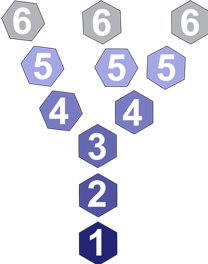

In [2]:
Image('./Media/tree_layers.png',width='200')

In [84]:
layer_selector = GlycanLayerSelector()

In [87]:
#Lets select just the first two layers of all the glycans.

layer_selector.set_layer(0, 1)
print_selection(pose, layer_selector.apply(pose))

388 Glc
389 Glc
391 Glc
392 Glc
396 Glc
797 Glc
798 Glc
799 Fuc
800 Glc
801 Glc
805 Glc


In [88]:
#Now lets select only those glycans that have larger layers
layer_selector.set_layer_as_greater_than_or_equal_to(2)
print_selection(pose, layer_selector.apply(pose))

390 Man
393 Man
394 Man
395 Man
802 Man
803 Man
804 Man


Note the residues 802, and children 803 and 804.  Both 803 and 804 will have the same layer.

### GlycanSequonSelector

So we have some tools for selecting specific glycan residues we are interested in.  Now lets change tune a bit.  A Sequon is the 3 residue motif recognized by GlycosylTransferase that adds the first glycan onto a protein. There are a few sequon's that are recognized by the glycosylation machinery`[N:(not-p):(S or T)]`, and you can set all or specific ones to use in this selector (via RosettaScripts unfortunately).

We'll cover this more in-depth in the next tutorial, but this selector can be useful for finding potential glycosylation sites in a pose.

Note that the `ResidueInSequenceMotifSelector` is a general-purpose version of this selector. 

In [89]:
sequon_selector = GlycanSequonsSelector()
print_selection(pose, sequon_selector.apply(pose))

core.select.residue_selector.ResidueInSequenceMotifSelector: Use ResidueInSequenceMotifSelector with regular expression
core.select.residue_selector.ResidueInSequenceMotifSelector: searching in: LDNGLLQTPPMGWLAWERFRCNINCDEDPKNCISEQLFMEMADRMAQDGWRDMGYTYLNIDDCWIGGRDASGRLMPDPKRFPHGIPFLADYVHSLGLKLGIYADMGNFTCMGYPGTTLDKVVQDAQTFAEWKVDMLKLDGCFSTPEERAQGYPKMAAALNATGRPIAFSCSWPAYEGGLPPRVQYSLLADICNLWRNYDDIQDSWWSVLSILNWFVEHQDILQPVAGPGHWNDPDMLLIGNFGLSLEQSRAQMALWTVLAAPLLMSTDLRTISAQNMDILQNPLMIKINQDPLGIQGRRIHKEKSLIEVYMRPLSNKASALVFFSCRTDMPYRYHSSLGQLNFTGSVIYEAQDVYSGDIISGLRDETNFTVIINPSGVVMWYLYPIKZZZZZZZZZLDNGLLQTPPMGWLAWERFRCNINCDEDPKNCISEQLFMEMADRMAQDGWRDMGYTYLNIDDCWIGGRDASGRLMPDPKRFPHGIPFLADYVHSLGLKLGIYADMGNFTCMGYPGTTLDKVVQDAQTFAEWKVDMLKLDGCFSTPEERAQGYPKMAAALNATGRPIAFSCSWPAYEGGLPPRVQYSLLADICNLWRNYDDIQDSWWSVLSILNWFVEHQDILQPVAGPGHWNDPDMLLIGNFGLSLEQSRAQMALWTVLAAPLLMSTDLRTISAQNMDILQNPLMIKINQDPLGIQGRRIHKEKSLIEVYMRPLSNKASALVFFSCRTDMPYRYHSSLGQLNFTGSVIYEAQDVYSGDIISGLRDETNFTVIINPSGVVMWYLYPIKNLEMSQQHHHHHHZZZZZZZZZ

Note that while 8 motifs were found in th pose, not all are glycosylated - in fact 6/8 are glycosylated from our information from the `GlycanInfoMover`

### RandomGlycanFoliageSelector

This is a simple selector that Selects a random carbohydrate residue from a subset or selector, then selects the rest of the glycan foliage.  Used for sampling.

In [114]:
random_foliage = RandomGlycanFoliageSelector()

In [115]:
random_foliage.set_selector(glycan_selector)
print_selection(pose, random_foliage.apply(pose))

801 Glc
802 Man
803 Man
804 Man


In [116]:
print_selection(pose, random_foliage.apply(pose))

396 Glc


In [117]:
print_selection(pose, random_foliage.apply(pose))

804 Man


In [118]:
print_selection(pose, random_foliage.apply(pose))

388 Glc
389 Glc
390 Man


## Glycan Movers

Lets do a quick look at some useful glycan-specific movers 

### LinkageConformerMover

The `LinkageConformerMover` is an integral part of glycan modeling.  This mover puts a 'conformer' of glycan dihedrals into a pose that was identified through a large-scale bioinformatic analysis.  A conformer is a well-defined and well-represented set of dihedral angles for a specific linkage.  The linkage is specific for different types of sugars in the i and i+1 spot, as well as the specific the i+1 glcyan is connected to on residue i.  The mover is useful, but should not be used by itself.  You will want a MonteCarlo object, and most likely some packing and minimization to go with it. 

In [99]:
from rosetta.protocols.carbohydrates import *
score = get_score_function()
mc = MonteCarlo(pose, score, 4.0)


core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.ScoreFunctionFactory: The -include_sugars flag was used with no sugar_bb weight set in the weights file.  Setting sugar_bb weight to 1.0 by default.
basic.io.database: Database file opened: scoring/score_functions/elec_cp_reps.dat
core.scoring.elec.util: Read 40 countpair representative atoms
core.pack.dunbrack.RotamerLibrary: shapovalov_lib_fixes_enable option is true.
core.pack.dunbrack.RotamerLibrary: shapovalov_lib::shap_dun10_smooth_level of 1( aka lowest_smooth ) got activated.
core.pack.dunbrack.RotamerLibrary: Binary rotamer library selected: /Users/jadolfbr/Library/Python/3.6/lib/python/site-packages/pyrosetta-2019.39+release.93456a567a8-py3.6-macosx-10.6-intel.egg/pyrosetta/database/rotamer/shapovalov/StpDwn_0-0-0/Dunbrack10.lib.bin
core.pack.dunbrack.RotamerLibrary: Using Dunbrack library binary file '/Users/jadolfbr/Library/Python/3.6/lib/python/site-packages/pyrosetta-2019.39+release.93456a567a8-py3.6-m

In [100]:
conformer_mover = LinkageConformerMover()

In [103]:
conformer_mover.set_residue_selector(layer_selector)
conformer_mover.set_use_gaussian_sampling(True)
conformer_mover.set_use_conformer_population_stats(False)

pose = pose_original.clone()

for i in range(1, 750):
    conformer_mover.apply(pose)
    print(score.score(pose), mc.boltzmann(pose))

mc.recover_low(pose)
print(score.score(pose_original), score.score(pose))

protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1910.365382431397 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
854.641318110847 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1045.7761787311688 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling confo

protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2653.737773416269 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2544.145827042852 False
protocols.carbohydrates.LinkageConformerMover: Sampling beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2637.429078150533 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-475.5917746

protocols.carbohydrates.LinkageConformerMover: Complete
-2736.615549335562 True
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
4772.334435133841 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-1288.4602894546413 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-1579.986918110509 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-b

protocols.carbohydrates.LinkageConformerMover: Complete
-1489.214545614799 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1899.0802747223843 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-400.39072782950996 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-185.56135876662404 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-b

-1496.6694370306768 False
protocols.carbohydrates.LinkageConformerMover: Sampling beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2707.6229550217085 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-565.7566577547202 False
protocols.carbohydrates.LinkageConformerMover: Sampling beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2637.3106066745536 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConfor

protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2018.9009020565502 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
4512.61356462916 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2733.485560186264 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2439.1974675

protocols.carbohydrates.LinkageConformerMover: Complete
-2654.3388071781405 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-83.98129894785973 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1523.4862845436462 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2547.44314970726 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-M

-2638.9777708731926 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-14.078755795899099 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1226.5298660714968 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
1540.4188982005187 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConforme

protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-2168.809918047628 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-2647.7873506803317 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2387.1970696937847 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1542.25912036

protocols.carbohydrates.LinkageConformerMover: Complete
-2207.0822767654086 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2181.2684993583466 False
protocols.carbohydrates.LinkageConformerMover: Sampling beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2633.1486892369917 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1395.20874899647 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- link

protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2725.169745045999 True
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-1627.314692593718 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-2708.373909344184 True
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
681.1118118

protocols.carbohydrates.LinkageConformerMover: Complete
-102.97366450510899 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1800.8174262929165 False
protocols.carbohydrates.LinkageConformerMover: Sampling beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2430.487052271447 False
protocols.carbohydrates.LinkageConformerMover: Sampling beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2670.198489416823 False
protocols.carbohydrates.LinkageConformerMover: Sampling beta-D-Manp-(?->4)-beta-D-GlcpNAc- 

protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2411.9229631977064 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1638.0185302354168 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-1424.3866175844898 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2682.833037400351

protocols.carbohydrates.LinkageConformerMover: Complete
-2184.054374209926 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1959.3056125758937 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-738.8779575418313 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1236.2649407166682 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-

771.2298346271876 False
protocols.carbohydrates.LinkageConformerMover: Sampling beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1711.3332701563868 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
2009.3640084541437 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-760.9258456067749 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageCo

protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2302.326038988519 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-2718.59446546397 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-580.4853535214178 False
protocols.carbohydrates.LinkageConformerMover: Sampling beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2727.0013084

protocols.carbohydrates.LinkageConformerMover: Complete
-2510.793271227098 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
765.350368047162 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-2710.340001146553 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-2693.542597645613 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D

-2487.2815283933014 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-209.10608642849238 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2712.547720205486 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2169.960629504904 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMo

protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-536.889660226738 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1990.8806075457376 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-2648.9139922048216 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-2567.7488

protocols.carbohydrates.LinkageConformerMover: Complete
-2603.2274124499745 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2678.099444164925 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-2724.5782513922527 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2733.129245263155 True
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->

-2329.5969882258355 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
4272.010261885292 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2737.9693876317438 True
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-2731.5134342335837 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConfo

protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-2632.1375657194953 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-227.42324609010714 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1419.720517078684 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2658.319492

protocols.carbohydrates.LinkageConformerMover: Complete
-2385.538171872276 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1596.6796385540629 False
protocols.carbohydrates.LinkageConformerMover: Sampling beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2668.833297930253 False
protocols.carbohydrates.LinkageConformerMover: Sampling beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2706.3396667691545 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta

1169.0711862003454 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-871.7819758115025 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2615.350306720846 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
4591.282699282692 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMov

protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1851.1537580492723 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2653.409564384554 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2717.7003547625072 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-2613.729855

protocols.carbohydrates.LinkageConformerMover: Complete
-2723.109000670661 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1982.8554310575853 False
protocols.carbohydrates.LinkageConformerMover: Sampling ->3)-beta-D-Manp-(?->4)-beta-D-GlcpNAc- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2684.8178899187947 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2687.3378953085394 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp

-214.03801077859973 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-2727.5442688470057 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which has a population of 0.4401
protocols.carbohydrates.LinkageConformerMover: Complete
-2706.1013300822215 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1167.78061664291 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMove

protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2415.7827233981334 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2687.848157382291 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-2106.3521701289533 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2265.781906554375 

Did we find a better conformer? Did our energy decrease even in a pre-refined pose?  It should be noted that we use guassian sampling to sample around the gaussian using the standard deviation and mean of each dihedral in the conformer.  Otherwise, we just use the mean.  This gives some variance in our conformers.

Use the RMSDMetric and the `LayerSelector` and `GlycanLayerSelector` to calculate the RMSD of change of the pose relative to the original_pose.  Take a look in PyMol.  How much has it changed?

### Correcting Structures

#### TautomerizeAnomerMover

This mover is useful when solving structures of glycans or fixing errors in PDB files.  Here is the description:

A Mover class for tautomerizing from one anomer to another at a reducing end.

@details  

This carbohydrate-specific Mover randomly selects a free reducing end (not a glycoside) and inverts the
stereochemistry, swapping alpha anomers for beta and beta for alpha.  (This could be considered an extremely
limited design case; however, reducing ends readily tautomerize in solution, in contrast to other cases, in which
residues do not readily mutate into others!)  

It is generally not certain which form is preferred (if any) in
sugar-binding proteins, and crystal structures sometimes arbitrarily assign one anomer over another when fitting
density, so this Mover can assure that each anomer is sampled.
If a ResidueSelector is set, the Mover will select from the subset at random; it will not guarantee
tautomerization of every Residue in the subset.

In this case, all of our residues are lower termini, as they are all connected to proteins - so this mover doesn't do anything for us - but if you had free glycans, you could use this here. 


In [110]:
glycan_selector = GlycanResidueSelector()

tautomerize_mover = TautomerizeAnomerMover()
tautomerize_mover.selector(glycan_selector)


pose = pose_original.clone()

tautomerize_mover.apply(pose)

protocols.carbohydrates.TautomerizeAnomerMover: Mover name: TautomerizeAnomerMover, Mover type: TautomerizeAnomerMover, Mover current tag:NoTag
protocols.carbohydrates.TautomerizeAnomerMover: Getting movable residues....
protocols.carbohydrates.TautomerizeAnomerMover: [ WARNING ] There are no movable residues available in the given pose.


#### IdealizeAnomericHydrogens

This mover was references in Frenz, et al - Automatically fixing errors in carbohydrate structures.  Referenced in the previous tutorial.  It is used to idealize anomeric hydrogens, which sometimes can be quite wrong in structures or not well optimized. Since our input structure was actually refined through cartesian relax into the crystal density, the hydrogens should already be idealized.

In [111]:
pose = pose_original.clone()
idealize_anomeric_hs = IdealizeAnomericHydrogens()
idealize_anomeric_hs.apply(pose)

print(score.score(pose_original), score.score(pose))

-2745.382718468612 -2745.1021866545157


#### RingPlaneFlipMover

https://www.rosettacommons.org/docs/latest/scripting_documentation/RosettaScripts/Movers/movers_pages/carbohydrates/RingPlaneFlipMover

Based on a given ResidueSelector and limited by a MoveMap, this Mover selects applicable cyclic residues and performs a 180-degree shearing move in which the anomeric bond and the main-chain bond on the opposite side of the ring are moved in opposite directions. An "applicable" residue is limited to 1,4-linked aldopyranoses or 2,5-linked ketopyranoses for which both the anomeric bond and the glycosidic linkage bond are equatorial.

This Mover is useful in cases — for example, when working with highly charged and sulfated heparins — where Rosetta models an oligo- or polysaccharide in such a way that the residue is sitting in the relatively correct position but is missing favorable interactions that it could make on the other side of the glycan ring. Sometimes, a simple "ring flip" could correct this, but the energy barrier to rotate is too high; the small moves of a ShearMover would never flip the ring around.

In [112]:
ring_flipper = RingPlaneFlipMover()

pose = pose_original.clone()
mc = MonteCarlo(pose, score, 4.0)

for i in range(1, 200):
    ring_flipper.apply(pose)
    print(score.score(pose), mc.boltzmann(pose))

mc.recover_low(pose)
print(score.score(pose_original), score.score(pose))

protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducin

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 392
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-1713.1913250798432 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrat

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of a terminal residue off residue 0
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2659.55

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)

-2659.553033740821 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 392
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-1713.1913250798432 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrat

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 392
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-1713.1913250798432 False
pro

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)

-2186.408737442011 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of a terminal residue off residue 0
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2659.553033740821 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
p

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 389
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2089.6235050276614 False
pro

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)

-2186.408737442011 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of a terminal residue off residue 0
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2659.553033740821 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
p

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of a terminal residue off residue 0
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2186.40

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)

-2089.6235050276614 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of a terminal residue off residue 0
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2659.553033740821 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
p

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of a terminal residue off residue 0
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2186.40

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)

-2186.408737442011 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 801
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-1430.5603589410046 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydra

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping rin

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checki

protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2186.408737442011 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip..

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 389
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2089.6235050276614 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydra

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping rin

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checki

protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2186.408737442011 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip..

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of a terminal residue off residue 0
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2186.408737442011 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....


protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping rin

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checki

protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2186.408737442011 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip..

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 801
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-1430.5603589410046 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydra

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping rin

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checki

protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2089.6235050276614 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip.

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 801
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-1430.5603589410046 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydra

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping rin

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checki

protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 801
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-1430.5603589410046 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.R

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of a terminal residue off residue 0
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2659.553033740821 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....


protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlan

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checki

protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 801
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-1430.5603589410046 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.R

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 389
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2089.6235050276614 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydra

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping rin

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checki

protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-1430.5603589410046 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip.

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 801
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-1430.5603589410046 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydra

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 801 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping rin

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 396 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 798 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-L-Fucp:non-reducing_end 799 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 800 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checki

protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2186.408737442011 False
protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip..

protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 803 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 804 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducing_end:2-AcNH 805 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Applying RingPlaneFlipMover to pose....
protocols.carbohydrates.RingPlaneFlipMover: Flipping ring plane of residue 389
protocols.carbohydrates.RingPlaneFlipMover: Move(s) complete.
-2089.6235050276614 False
-2745.382718468612 -2745.382718468611


### Glycosylation

Glycosylation can be performed by either a function as you have seen in the previous tutorial, or through a mover, the `SimpleGlycosylateMover`.  This mover is covered in the next tutorial

### BB Sampling

Here, we will cover a few more components of glycan sampling, without the modeling movers covered in the next section

#### GlycanTreeMinMover
The `GlycanTreeMinMover` is useful as it randomly selects a glycan tree and a residue in the glycan tree set to move through a movemap, and then minimizes the rest of glycan foliage. Underneath the hood, it uses the `RandomGlycanFoliageSelector`.  

In [119]:
foliage_min = GlycanTreeMinMover(glycan_selector)
foliage_min.apply(pose)

protocols.carbohydrates.GlycanTreeMinMover: Minimizing from carbohydrate root: 390
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.ScoreFunctionFactory: The -include_sugars flag was used with no sugar_bb weight set in the weights file.  Setting sugar_bb weight to 1.0 by default.
protocols.carbohydrates.GlycanTreeMinMover: Minimizing 1 residues


In [120]:
foliage_min.apply(pose)

protocols.carbohydrates.GlycanTreeMinMover: Minimizing from carbohydrate root: 799
protocols.carbohydrates.GlycanTreeMinMover: Minimizing 1 residues


In [121]:
foliage_min.apply(pose)

protocols.carbohydrates.GlycanTreeMinMover: Minimizing from carbohydrate root: 801
protocols.carbohydrates.GlycanTreeMinMover: Minimizing 4 residues


#### BBSampler: SugarBBSampler

Since glycans can have 2-4+ dihedral angles, a new way to sample specific backbone residues was created.  This is the BBSampler framework. It is also integrated into the GlycanModeler covered in the next chapter.

The `SugarBBSampler` works by using the `sugar_bb` energy term as probabilities for each dihedral of each linkage type and using them for sampling.

Note that we could sample on omega as well, and we can give the sampler a mask using the function `set_dihedral_mask()` that tells it which residues have which dihedrals to sample.  For now, we'll just sample phi and psi.

In [126]:
from rosetta.protocols.simple_moves import *
from rosetta.protocols.simple_moves.bb_sampler import *
from rosetta.core.id import *

In [127]:
sampler = BBDihedralSamplerMover()
sugar_bb_phi = SugarBBSampler(phi_dihedral)
sugar_bb_psi = SugarBBSampler(psi_dihedral)

In [130]:
#We include from residue 801, as there is no sugarbb data for the ASN-glycan linkage.  
glycan_selector.set_select_from_branch_residue(801)
glycan_selector.set_include_root(True)

sampler.add_sampler(sugar_bb_phi)
sampler.add_sampler(sugar_bb_psi)
sampler.set_residue_selector(glycan_selector)
for i in range(1, 300):
    sampler.apply(pose)
    print(score.score(pose), mc.boltzmann(pose))

mc.recover_low(pose)
print(score.score(pose_original), score.score(pose))

-2752.1656836052152 True
-2751.872132630229 True
-2724.177841316109 False
-2751.842261395654 True
-2746.9076845786617 True
-2751.584806673987 True
-2750.506148444401 False
-2747.944979626023 False
-2749.335104459393 False
-2747.689031617554 False
-2751.5330227515274 True
-2741.8592555546898 False
-2751.483368861345 True
-2750.7269310194156 True
-2407.66734288903 False
-2751.372870640863 True
-2671.2526794406403 False
-2751.3406820699265 True
-2750.517030538459 True
-2749.56644096143 True
-2748.7371259057127 True
-2690.171369191909 False
-2748.5632340744833 True
-2750.1611441567 True
-2750.0719813883807 True
-2714.7754554002645 False
-2746.277283337242 False
-2749.6752339400173 True
-2740.383132665016 False
-2749.4180069812805 True
-2749.630684295231 True
-2748.6702479306823 True
-2727.15081636247 False
-2748.7968198645076 True
-2672.0326213632384 False
-2747.3194961909694 True
-2747.0116343229856 True
-2677.722100384228 False
-2675.9329047462224 False
-389.4738784285786 False
-2746.079

-2644.9275657521207 False
-2747.8746418351175 False
-2749.0558785315984 True
-2747.17135098538 True
-2747.078777613741 True
-2741.092012977037 False
-2746.843441751055 True
-2744.7199887197685 True
-2743.648714108821 True
-2743.837105174152 True
-2744.0104298260635 True
-2746.0537082301935 True
-2745.6542764104065 True
-2745.331007382317 True
-2745.349189536252 True
-2744.5528960625857 True
-2743.802129769316 True
-2555.576519609021 False
-2702.444064456306 False
-2744.6709387495125 True
-2590.102076691884 False
-2741.9158629097833 False
-2744.8717083893584 True
-2745.789258340926 True
-2746.036571668989 True
-2746.3842920760694 True
-2747.355602034648 True
-2745.7973584089464 False
-2745.3411512744815 True
-2745.192437588493 True
-2747.8821756122265 True
-2747.9832675986227 True
-2748.0176739339045 True
-2615.998651036259 False
-2737.4522330922196 False
-1901.2732242877587 False
-2746.5204669885434 True
-2747.9794650562226 True
-1942.0806636069833 False
-2747.9852310464303 True
-2747.

-2728.152003370652 False
-2738.982588834316 True
-2740.453312029246 True
-2743.643247048985 True
-2744.137123435492 True
-1653.2237772658978 False
-2742.6969770825217 True
-2720.788579134838 False
-2479.9494553640247 False
-2732.300801066514 False
-2743.9394043472516 True
-1831.6461150480923 False
-2742.831420028043 False
-2744.0367568551956 True
-2740.47975029505 False
-2741.2469785109215 True
-2738.1654787827206 True
-2737.169504298605 False
-2729.8225844039184 False
-2736.879870010645 True
-2740.071150528564 True
-2741.7265280297765 True
-2171.924244896804 False
-2739.842382448524 True
-2636.706381122397 False
-2715.1441305476633 False
-2645.8222871001485 False
-2739.211219499902 True
-2739.704903616832 True
-2717.393603849158 False
-2713.4046325757704 False
-2739.7289920754333 True
-2498.145926329353 False
-2738.732180953701 True
-2737.88841511688 True
-2739.1285766384135 True
-2739.7672703352314 True
-2734.533868419191 False
-2745.674944494429 True
-2745.6507022296123 True
-2744.9

-1930.6491533736757 False
-2747.4791713096515 False
-2750.9300058024332 True
-2672.73869893402 False
-2589.980219426009 False
-2750.87961021549 True
-2745.382718468612 -2752.20685277433


Were we able to improve the energy just from using sugarBB on this glycan tree?

## Conclusion

This has covered most of the current RosettaCarbohydrate components you may find useful.  The next tutorial will build on these components and use new movers that encorporate them for modeling and design. 

<!--NAVIGATION-->
< [RosettaCarbohydrates](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.00-RosettaCarbohydrates-Working-with-Glycans.ipynb) | [Contents](toc.ipynb) | [Index](index.ipynb) | [RosettaCarbohydrates: Modeling and Design](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.02-Glycan-Modeling-and-Design.ipynb) ><p><a href="https://colab.research.google.com/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.01-Glycan-Trees-Selectors-and-Movers.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>